#*Dataset extraído do Kaggle*

https://www.kaggle.com/brjapon/gearbox-fault-diagnosis

Carga = 40

In [106]:
import pandas as pd
from sklearn import model_selection
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#algoritmos
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
#Importando a biblioteca das métricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#para fazer o cross validation
from sklearn.model_selection import cross_val_score


In [107]:
url_dados = 'https://github.com/rslmartins/gearbox-failure/blob/main/BrokenTooth/b30hz40.csv?raw=true'

data1 = pd.read_csv(url_dados, sep= ',')

In [108]:
url_dados = 'https://github.com/rslmartins/gearbox-failure/blob/main/Healthy/h30hz40.csv?raw=true'

data2 = pd.read_csv(url_dados, sep= ',')

In [109]:
# inserindo o atributo de classe defeituosa
data1['class']= data1['a1'].apply(lambda x:1)

In [110]:
data1.describe()

,a1,a2,a3,a4,class
count,94464.000000,94464.000000,94464.000000,94464.000000,94464.0
mean,-0.001559,0.005216,0.012747,0.010159,1.0
std,4.499271,4.199833,3.799578,4.345416,0.0
min,-24.912300,-30.730400,-22.013900,-23.715400,1.0
25%,-2.807112,-2.359585,-1.989587,-2.366210,1.0
50%,-0.096139,0.158589,0.113324,0.168463,1.0
75%,2.660953,2.614850,2.130788,2.535732,1.0
max,24.146400,23.454600,23.284500,32.366100,1.0


In [111]:
# inserindo o atributo de classe ok
data2['class']= data2['a1'].apply(lambda x:0)

In [112]:
data2.describe()

,a1,a2,a3,a4,class
count,100608.000000,100608.000000,100608.000000,100608.000000,100608.0
mean,-0.012099,0.002885,-0.017063,0.001601,0.0
std,7.558153,4.509020,4.174153,4.534764,0.0
min,-49.543200,-32.769000,-27.473200,-27.311400,0.0
25%,-4.059773,-2.423577,-2.302938,-2.455220,0.0
50%,-0.217701,0.090400,0.043835,0.165216,0.0
75%,3.839710,2.514580,2.377420,2.598295,0.0
max,50.229700,30.928300,21.550300,31.012500,0.0


In [113]:
data = pd.concat([data1,data2])

In [114]:
data

,a1,a2,a3,a4,class
0,-3.17043,1.241340,-3.557910,-0.342549,1
1,-7.43122,1.184260,-0.552499,-3.667440,1
2,-4.92843,2.640790,0.459975,-0.489992,1
3,-2.43743,3.114910,2.017930,3.492710,1
4,1.10040,0.531721,2.041390,3.176920,1
...,...,...,...,...,...
100603,-1.81021,-1.338130,-4.232510,1.106480,0
100604,-4.90746,1.820860,-3.727170,3.979240,0
100605,-1.67954,0.614342,0.831932,4.511940,0
100606,3.98700,3.330530,2.109150,2.503510,0


In [115]:
#data.to_csv('File.csv', index = False)

In [116]:
data.describe()

,a1,a2,a3,a4,class
count,195072.000000,195072.000000,195072.000000,195072.000000,195072.000000
mean,-0.006995,0.004014,-0.002628,0.005745,0.484252
std,6.266196,4.362022,3.997168,4.444070,0.499753
min,-49.543200,-32.769000,-27.473200,-27.311400,0.000000
25%,-3.369635,-2.392300,-2.150685,-2.410895,0.000000
50%,-0.149969,0.124166,0.081608,0.166797,0.000000
75%,3.168912,2.562637,2.249693,2.567333,1.000000
max,50.229700,30.928300,23.284500,32.366100,1.000000


In [117]:
data.head()

,a1,a2,a3,a4,class
0,-3.17043,1.241340,-3.557910,-0.342549,1
1,-7.43122,1.184260,-0.552499,-3.667440,1
2,-4.92843,2.640790,0.459975,-0.489992,1
3,-2.43743,3.114910,2.017930,3.492710,1
4,1.10040,0.531721,2.041390,3.176920,1


In [118]:
data_atrib = data.iloc[:,0:4]

In [119]:
data_atrib

,a1,a2,a3,a4
0,-3.17043,1.241340,-3.557910,-0.342549
1,-7.43122,1.184260,-0.552499,-3.667440
2,-4.92843,2.640790,0.459975,-0.489992
3,-2.43743,3.114910,2.017930,3.492710
4,1.10040,0.531721,2.041390,3.176920
...,...,...,...,...
100603,-1.81021,-1.338130,-4.232510,1.106480
100604,-4.90746,1.820860,-3.727170,3.979240
100605,-1.67954,0.614342,0.831932,4.511940
100606,3.98700,3.330530,2.109150,2.503510


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

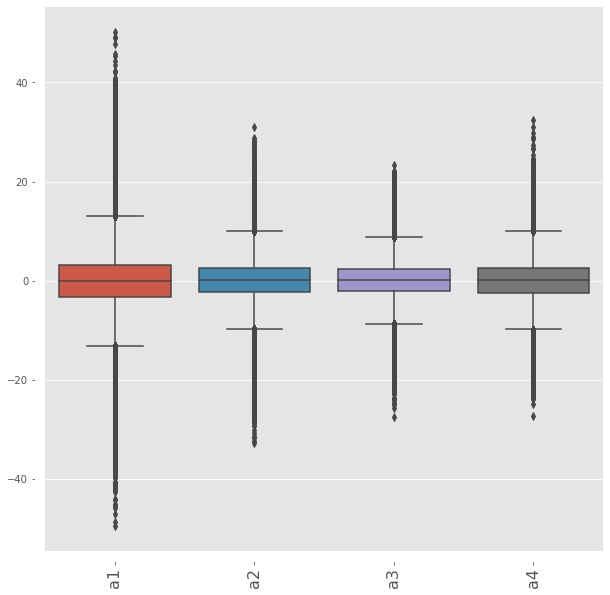

In [120]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_atrib)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90, fontsize=16)

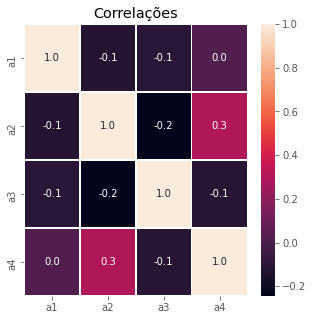

In [121]:
#correlation map
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data_atrib.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlações')
plt.show()

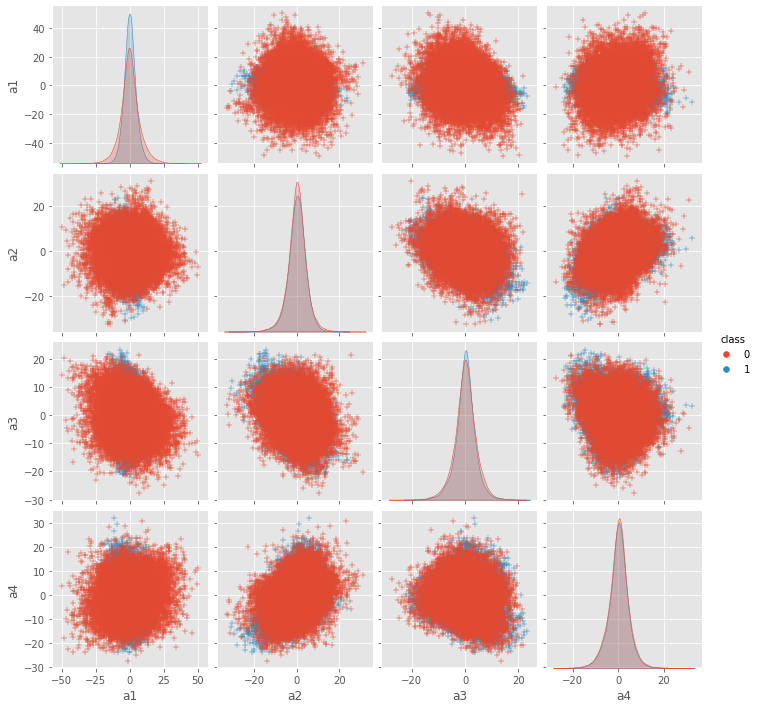

In [148]:

g = sns.pairplot(data, hue='class', markers='+')
plt.show()


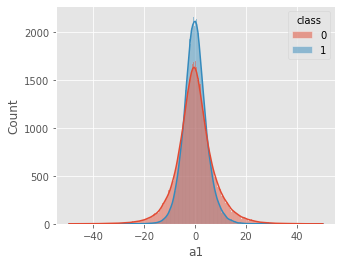

In [142]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a1", hue="class",kde=True)

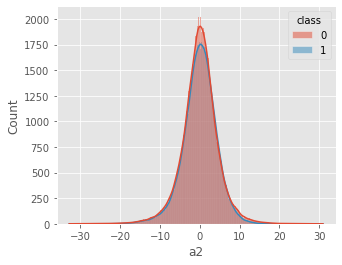

In [143]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a2", hue="class",kde=True)

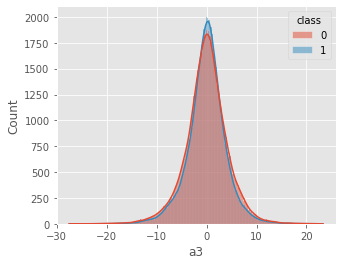

In [145]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a3", hue="class",kde=True)

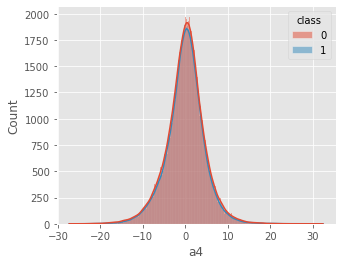

In [147]:
plt.figure(figsize=(5,4))
ax = sns.histplot(data=data, x="a4", hue="class",kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


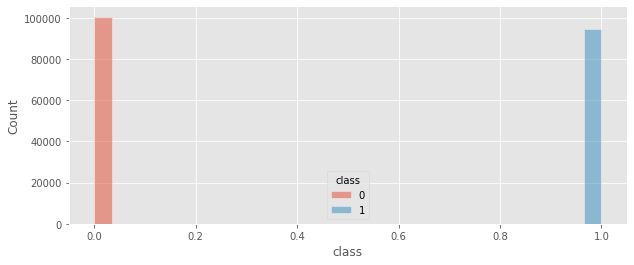

In [127]:
plt.figure(figsize=(10,4))
ax = sns.histplot(data=data, x="class", hue="class",kde=True)

In [128]:
# Split o dataset e definindo as variáveis de treino e teste 
X = data.drop("class", axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,stratify = y, random_state=42)

#Pré-processamento 

##retirarando os outliers

In [150]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
transformer
RobustScaler()
Xr=transformer.transform(X)

In [151]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, y, test_size=1/3,stratify = y, random_state=42)

##Normalização

In [152]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(data.iloc[:,:-1])

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [154]:
data_Norm = scaler.transform(data.iloc[:,:-1])

In [155]:
data_Norm = pd.DataFrame(scaler.transform(data.iloc[:,:-1]), columns=data.iloc[:,:-1].columns) 

In [156]:
data_Norm

,a1,a2,a3,a4
0,-0.070434,0.067874,-0.057668,-0.096180
1,-0.155843,0.066082,0.060753,-0.207609
2,-0.105674,0.111814,0.100648,-0.101122
3,-0.055740,0.126701,0.162036,0.032353
4,0.015177,0.045593,0.162960,0.021769
...,...,...,...,...
195067,-0.043167,-0.013118,-0.084250,-0.047618
195068,-0.105253,0.086070,-0.064338,0.048658
195069,-0.040548,0.048187,0.115304,0.066510
195070,0.073041,0.133471,0.165630,-0.000799


In [157]:
#df_Normalized = pd.concat([data_Norm,data.iloc[:,-1]], axis=1)

In [158]:
Xn = data_Norm
yn = data['class']

In [159]:
data['class'].value_counts()

0    100608
1     94464
Name: class, dtype: int64

In [160]:
data_Norm['a1'].describe()

count    195072.000000
mean         -0.007021
std           0.125609
min          -1.000000
25%          -0.074427
50%          -0.009887
75%           0.056642
max           1.000000
Name: a1, dtype: float64

In [161]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=1/3,stratify = yn, random_state=42)

#Classificadores


##Dummy Classifier

In [36]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(X_train, y_train)
previsao_dummy = modelo_dummy.predict(X_test)
accuracy_score(y_test, previsao_dummy)

0.515748031496063

##Árvores de Decisão

###Entropia

In [37]:
#Variar os hiperparametros de tamanho da árvore
depth_range = list(range(1, 20))
print(depth_range)

param_grid_tree = dict(max_depth=depth_range)
print(param_grid_tree)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [38]:
"""
#Fazendo um dicionário chamado param_grid contendo os parâmetros que serão variados também o tipo de algoritmo
param_grid_tree['criterion'] = ['entropy','gini']
"""

"\n#Fazendo um dicionário chamado param_grid contendo os parâmetros que serão variados também o tipo de algoritmo\nparam_grid_tree['criterion'] = ['entropy','gini']\n"

In [39]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

grid_tree = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy'), param_grid_tree, refit = True, verbose=3, cv=5)
grid_tree.fit(X_train, y_train)
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_tree.best_estimator_)
print("melhores Parâmetros: ",grid_tree.best_params_)
print("Melhor score: ",grid_tree.score(X_test, y_test))

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.520, total=   0.2s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.516, total=   0.2s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.516, total=   0.2s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.516, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.516, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.559, total=   0.3s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.551, total=   0.3s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.551, total=   0.3s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.553, total=   0.3s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.555, total=   0.3s
[CV] max_depth=3 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  1.8min finished


-----------------------------------------------------------
melhor estimador:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
melhores Parâmetros:  {'max_depth': 10}
Melhor score:  0.6067452017716536


In [87]:
#Criando objeto da árvore de decisão e treinando
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth= 10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [88]:
#Computar a acurácia do teste
test_accuracy_tree = clf.score(X_test, y_test)
print('Acurácia do teste = ' ,test_accuracy_tree)

predictions_tree = clf.predict(X_test)
print(confusion_matrix(y_test, predictions_tree))
print(classification_report(y_test, predictions_tree))

Acurácia do teste =  0.6068067175196851
[[15956 17580]
 [ 7987 23501]]
              precision    recall  f1-score   support

           0       0.67      0.48      0.56     33536
           1       0.57      0.75      0.65     31488

    accuracy                           0.61     65024
   macro avg       0.62      0.61      0.60     65024
weighted avg       0.62      0.61      0.60     65024



A precisão está ruím!!!! A quantidade de false positive está gigante.  Isto é, a quantidade que ele classifica como falha, mas que não foi falha está grande.

---

No entanto, a cobertura é muito boa


###CART

In [42]:
#Variar os hiperparametros de tamanho da árvore
depth_cart = list(range(1, 20))
print(depth_cart)

param_grid_cart = dict(max_depth=depth_cart)
print(param_grid_cart)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [43]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

grid_CART = GridSearchCV(DecisionTreeClassifier(criterion = 'gini'), param_grid_cart, refit = True, verbose=3, cv=5)
grid_CART.fit(X_train, y_train)
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_CART.best_estimator_)
print("melhores Parâmetros: ",grid_CART.best_params_)
print("Melhor score: ",grid_CART.score(X_test, y_test))

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.520, total=   0.1s
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......................... max_depth=1, score=0.520, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.521, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.523, total=   0.1s
[CV] max_depth=1 .....................................................
[CV] ......................... max_depth=1, score=0.521, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.561, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.558, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.559, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  1.0min finished


-----------------------------------------------------------
melhor estimador:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
melhores Parâmetros:  {'max_depth': 10}
Melhor score:  0.6066221702755905


In [85]:
#Criando objeto da árvore de decisão e treinando
clfCART = tree.DecisionTreeClassifier(criterion = 'gini', max_depth= 10)
clfCART.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
#Computar a acurácia do teste
test_accuracy_CART = clfCART.score(X_test, y_test)
print('Acurácia do teste = ' ,test_accuracy_CART)

predictions_CART = clfCART.predict(X_test)
print(confusion_matrix(y_test, predictions_CART))
print(classification_report(y_test, predictions_CART))

Acurácia do teste =  0.6065452755905512
[[15517 18019]
 [ 7565 23923]]
              precision    recall  f1-score   support

           0       0.67      0.46      0.55     33536
           1       0.57      0.76      0.65     31488

    accuracy                           0.61     65024
   macro avg       0.62      0.61      0.60     65024
weighted avg       0.62      0.61      0.60     65024



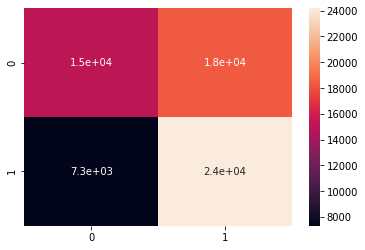

In [46]:
cm = pd.DataFrame(confusion_matrix(y_test, predictions_CART))
sns.heatmap(cm, annot=True)

##Random Forest


In [47]:
#Tentei usar um número grande de árvores votantes, mas ficou muito lento
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

In [48]:
#Variar os hiperparametros de tamanho do número de árvores votantes
estimadores = [10,20,50,100]

In [49]:
param_grid_RF = dict(n_estimators=estimadores)
print(param_grid_RF)

{'n_estimators': [10, 20, 50, 100]}


In [50]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

grid_RF = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid_RF, refit = True, verbose=3, cv=5)
grid_RF.fit(X_train, y_train)
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_RF.best_estimator_)
print("melhores Parâmetros: ",grid_RF.best_params_)
print("Melhor score: ",grid_RF.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... n_estimators=10, score=0.578, total=   5.0s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV] ..................... n_estimators=10, score=0.571, total=   4.9s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.0s remaining:    0.0s


[CV] ..................... n_estimators=10, score=0.578, total=   4.9s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.577, total=   4.9s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.578, total=   4.8s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.589, total=   9.6s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.580, total=   9.7s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.583, total=   9.6s
[CV] n_estimators=20 .................................................
[CV] ..................... n_estimators=20, score=0.584, total=   9.7s
[CV] n_estimators=20 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.4min finished


-----------------------------------------------------------
melhor estimador:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
melhores Parâmetros:  {'n_estimators': 100}
Melhor score:  0.596195250984252


In [51]:
#Criando objeto da árvore de decisão e treinando
rf = RandomForestClassifier(random_state = 42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [52]:
#Computar a acurácia do teste
test_accuracy_rf = rf.score(X_test, y_test)
print('Acurácia do teste = ' ,test_accuracy_rf)

predictions_rf = rf.predict(X_test)
print(confusion_matrix(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

Acurácia do teste =  0.596195250984252
[[19609 13927]
 [12330 19158]]
              precision    recall  f1-score   support

           0       0.61      0.58      0.60     33536
           1       0.58      0.61      0.59     31488

    accuracy                           0.60     65024
   macro avg       0.60      0.60      0.60     65024
weighted avg       0.60      0.60      0.60     65024



In [53]:
#cm = pd.DataFrame(confusion_matrix(y_test, predictions_rf), columns=data.target_names, index=data.target_names)
#sns.heatmap(cm, annot=True)

##K-NN

Foi testado o grid para chegar no melhor k para o KNN, mas optou-se em testar todos os valores de k de forma direta.

In [54]:
#Variar os parametros de tamanho do KNN
param_grid_KNN = dict(n_neighbors=list(range(1, 100,2)))
print(param_grid_KNN)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]}


In [55]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

"""grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, refit = True, verbose=3, cv=5)
grid_KNN.fit(Xn_train, yn_train)

print("-----------------------------------------------------------")
print("melhor estimador: ",grid_KNN.best_estimator_)
print("melhores Parâmetros: ",grid_KNN.best_params_)
print("Melhor score: ",grid_KNN.score(X_test, y_test))

"""

'grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, refit = True, verbose=3, cv=5)\ngrid_KNN.fit(Xn_train, yn_train)\n\nprint("-----------------------------------------------------------")\nprint("melhor estimador: ",grid_KNN.best_estimator_)\nprint("melhores Parâmetros: ",grid_KNN.best_params_)\nprint("Melhor score: ",grid_KNN.score(X_test, y_test))\n\n'

In [56]:
"""
#treinando o KNN com os melhores parâmetros
KNN = KNeighborsClassifier(n_neighbors=95)
KNN.fit(Xn_train, yn_train)
"""

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=95, p=2,
                     weights='uniform')

In [57]:
"""
#Computar a acurácia do teste
test_accuracy_KNN = KNN.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_KNN))

predictions_KNN = KNN.predict(Xn_test)
print(confusion_matrix(yn_test, predictions_KNN))
print(classification_report(yn_test, predictions_KNN))
"""

Acurácia do teste = 0.6164
[[17862 15674]
 [ 9266 22222]]
              precision    recall  f1-score   support

           0       0.66      0.53      0.59     33536
           1       0.59      0.71      0.64     31488

    accuracy                           0.62     65024
   macro avg       0.62      0.62      0.61     65024
weighted avg       0.62      0.62      0.61     65024



In [58]:
ListaKNN={}
res_test = []
test_accuracy = 0
val_max = 200
for i in range(1,val_max,2):
  KNN_teste = KNeighborsClassifier(n_neighbors=i)
  KNN_teste.fit(Xn_train, yn_train)
  #Computar a acurácia do teste
  test_accuracy = KNN_teste.score(Xn_test, yn_test)
  res_test.append(test_accuracy) 
  #print('Com k = ',i, ', a Acurácia do teste = ' ,test_accuracy)
  ListaKNN['KNN'+str(i)]=round(test_accuracy,3)

In [59]:
neighbors = np.arange(1,val_max,2)

In [60]:
valoresKNN = []
for item in ListaKNN.values():
  valoresKNN.append(item)

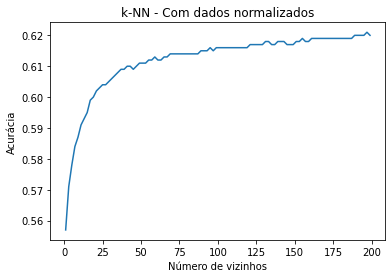

In [61]:
#Generate plot
plt.title('k-NN - Com dados normalizados')
plt.plot(neighbors,valoresKNN, label='Acurácia do Teste')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.show()

In [62]:
max(ListaKNN, key=ListaKNN.get)

'KNN197'

In [63]:
max(res_test)

0.6205401082677166

In [89]:
ListaKNN['KNN197']

0.621

In [90]:
#treinando o KNN com o k de maior acurárica
KNN = KNeighborsClassifier(n_neighbors=197)
KNN.fit(Xn_train, yn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=197, p=2,
                     weights='uniform')

In [91]:
#Computar a acurácia do teste
test_accuracy_KNN = KNN.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_KNN))

predictions_KNN = KNN.predict(Xn_test)
print(confusion_matrix(yn_test, predictions_KNN))
print(classification_report(yn_test, predictions_KNN))

Acurácia do teste = 0.6205
[[17289 16247]
 [ 8427 23061]]
              precision    recall  f1-score   support

           0       0.67      0.52      0.58     33536
           1       0.59      0.73      0.65     31488

    accuracy                           0.62     65024
   macro avg       0.63      0.62      0.62     65024
weighted avg       0.63      0.62      0.62     65024



##NB

In [67]:
#Fazendo um dicionário chamado param_grid contendo os hiperparâmetros que serão variados
parameters_NB = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}

In [68]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros
grid_NB = GridSearchCV(GaussianNB(), parameters_NB, refit = True, verbose=3, cv=10)
grid_NB.fit(X_train, y_train)


Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.569, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.572, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.572, total=   0.0s
[CV] var_smoothing=0.01 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .................. var_smoothing=0.01, score=0.579, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.567, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.571, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.575, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.572, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.576, total=   0.0s
[CV] var_smoothing=0.01 ..............................................
[CV] .................. var_smoothing=0.01, score=0.570, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [69]:
print("-----------------------------------------------------------")
print("melhor estimador: ",grid_NB.best_estimator_)
print("melhores Parâmetros: ",grid_NB.best_params_)
print("Melhor score: ",grid_NB.score(X_test, y_test))

-----------------------------------------------------------
melhor estimador:  GaussianNB(priors=None, var_smoothing=0.001)
melhores Parâmetros:  {'var_smoothing': 0.001}
Melhor score:  0.576417937992126


In [92]:
# treinando com os melhores parâmetros
NB = GaussianNB(var_smoothing = 0.001)
NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.001)

In [93]:
#Computar a acurácia do teste
test_accuracy_NB = NB.score(X_test, y_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_NB))

predictions_NB = NB.predict(X_test)
print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test, predictions_NB))

Acurácia do teste = 0.5764
[[13364 20172]
 [ 7371 24117]]
              precision    recall  f1-score   support

           0       0.64      0.40      0.49     33536
           1       0.54      0.77      0.64     31488

    accuracy                           0.58     65024
   macro avg       0.59      0.58      0.56     65024
weighted avg       0.60      0.58      0.56     65024



##SVM

SVM levando muito tempo.  Não será levado em consideração?

In [72]:
#Fazendo um dicionário chamado param_grid contendo os parâmetros que serão variados C e Gamma
param_SVM = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001],'kernel':['rbf', 'poly'],'degree':[2, 3, 4, 5]}

In [73]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros

"""grid_SVM = GridSearchCV(SVC(), param_SVM, refit = True, verbose=3, cv=5)
grid_SVM.fit(Xn_train, yn_train)"""

'grid_SVM = GridSearchCV(SVC(), param_SVM, refit = True, verbose=3, cv=5)\ngrid_SVM.fit(Xn_train, yn_train)'

In [74]:
"""print(grid_SVM.best_estimator_)

print(grid_SVM.best_params_)

print(grid_SVM.score(Xn_test, yn_test))
"""

'print(grid_SVM.best_estimator_)\n\nprint(grid_SVM.best_params_)\n\nprint(grid_SVM.score(Xn_test, yn_test))\n'

In [75]:
"""# treinando com os melhores parâmetros
SVM = SVC(kernel='poly')
SVM.fit(Xn_train, yn_train)"""

"# treinando com os melhores parâmetros\nSVM = SVC(kernel='poly')\nSVM.fit(Xn_train, yn_train)"

In [76]:
"""#Computar a acurácia do teste
test_accuracy_SVM = SVM.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_SVM))

predictions_SVM = SVM.predict(X_test)
print(confusion_matrix(yn_test, predictions_SVM))
print(classification_report(yn_test, predictions_SVM))"""

'#Computar a acurácia do teste\ntest_accuracy_SVM = SVM.score(Xn_test, yn_test)\nprint("Acurácia do teste = %0.4f" % (test_accuracy_SVM))\n\npredictions_SVM = SVM.predict(X_test)\nprint(confusion_matrix(yn_test, predictions_SVM))\nprint(classification_report(yn_test, predictions_SVM))'

##MLP

Grid levando muito tempo.  Hiperparâmetros não serão variados

In [77]:
# Criando objeto e treinando o modelo
MLP = MLPClassifier(max_iter=10000)


In [78]:
#Além dos parâmetros de neurônios das camadas intermediárias, busquei variar outros para avaliar os resultados.
parameter_space2 = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [79]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
   
}

In [80]:
#Criando o objeto GridSearch e treinando o modelo com os melhores hiperparâmetros
"""
grid_MLP = GridSearchCV(MLP, parameter_space, refit = True, verbose=3, cv=5)
grid_MLP.fit(Xn_train, yn_train)
"""

'\ngrid_MLP = GridSearchCV(MLP, parameter_space, refit = True, verbose=3, cv=5)\ngrid_MLP.fit(Xn_train, yn_train)\n'

In [81]:
"""print(grid_SVM.best_estimator_)

print(grid_SVM.best_params_)

print(grid_SVM.score(Xn_test, yn_test))
"""

'print(grid_SVM.best_estimator_)\n\nprint(grid_SVM.best_params_)\n\nprint(grid_SVM.score(Xn_test, yn_test))\n'

In [82]:
# Treinando o modelo
MLP = MLPClassifier(max_iter=10000)
MLP.fit(Xn_train, yn_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [83]:
#Computar a acurácia do teste
test_accuracy_MLP = MLP.score(Xn_test, yn_test)
print("Acurácia do teste = %0.4f" % (test_accuracy_MLP))

predictions_MLP = MLP.predict(X_test)
print(confusion_matrix(yn_test, predictions_MLP))
print(classification_report(yn_test, predictions_MLP))

Acurácia do teste = 0.6199
[[32219  1317]
 [29454  2034]]
              precision    recall  f1-score   support

           0       0.52      0.96      0.68     33536
           1       0.61      0.06      0.12     31488

    accuracy                           0.53     65024
   macro avg       0.56      0.51      0.40     65024
weighted avg       0.56      0.53      0.41     65024





---



---



#Teste da acurácia com diversos modelos usando o 10-fold cross validation para comparação

In [162]:
seed=42
models = []
models_results = []
scoring='accuracy'
models.append(('TREE', DecisionTreeClassifier(criterion = 'entropy', max_depth= 10)))
models.append(('CART', DecisionTreeClassifier(criterion = 'gini', max_depth= 10)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=197)))
models.append(('NB', GaussianNB(priors=None, var_smoothing=0.001)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Isolation Forest',IsolationForest()))
models.append(('MLP',MLPClassifier(max_iter=10000)))

#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, Xn_train, yn_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    lista = [name, cv_results.mean(), cv_results.std()]
    models_results.append(lista)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

TREE: 0.607183 (0.003455)
CART: 0.606922 (0.004927)
LR: 0.515702 (0.004101)
LDA: 0.515702 (0.004101)
KNN: 0.619079 (0.005253)
NB: 0.572650 (0.003687)
Random Forest: 0.597279 (0.003800)
Isolation Forest: 0.442529 (0.005497)
MLP: 0.619856 (0.004115)


In [163]:
models_results

[['TREE', 0.6071834827742353, 0.0034550812138913326],
 ['CART', 0.6069220383613667, 0.004927281128709868],
 ['LR', 0.5157018826372413, 0.004100673540547858],
 ['LDA', 0.5157018826372413, 0.004100673540547858],
 ['KNN', 0.6190790489330997, 0.005252782482864327],
 ['NB', 0.5726501123305034, 0.0036870700024747836],
 ['Random Forest', 0.597279460695322, 0.0037997479003143136],
 ['Isolation Forest', 0.44252892464637805, 0.005496695642436513],
 ['MLP', 0.6198556981432147, 0.004115169679406562]]

In [164]:
df_results = pd.DataFrame(models_results, 
                          columns = ['modelo','Acuracia_k-fold=10','Desvio-padrão'])
df_results.sort_values(by='Acuracia_k-fold=10', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

,modelo,Acuracia_k-fold=10,Desvio-padrão
0,MLP,0.619856,0.004115
1,KNN,0.619079,0.005253
2,TREE,0.607183,0.003455
3,CART,0.606922,0.004927
4,Random Forest,0.597279,0.003800
5,NB,0.572650,0.003687
6,LR,0.515702,0.004101
7,LDA,0.515702,0.004101
8,Isolation Forest,0.442529,0.005497


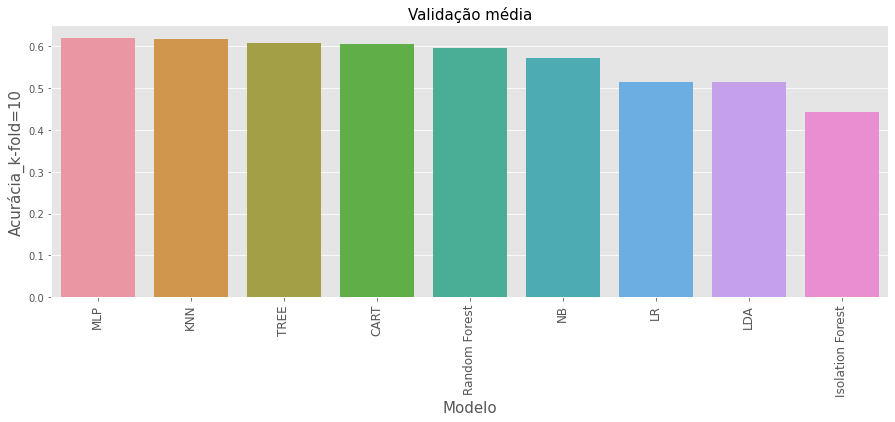

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize = (15,5))
sns.barplot(x = "modelo", y = "Acuracia_k-fold=10", data = df_results)
plt.title('Validação média', fontsize = 15)
#plt.ylim(0.8,1)
plt.xlabel('Modelo', fontsize=15)
plt.ylabel('Acurácia_k-fold=10',fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [166]:
models


[('TREE',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                         max_depth=10, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('CART',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=10, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            

# PCA

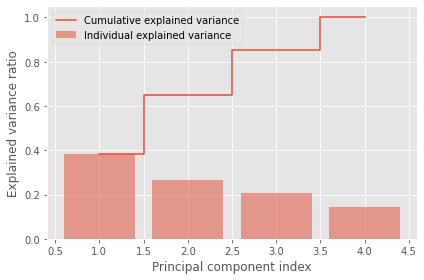

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(Xn_train)
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot

plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [168]:
N=3
columns_vector = ['element '+str(i) for i in range(1,N+1)]
pca = PCA(n_components=3)
df_PCA = pca.fit_transform(data_Norm)
df_PCA = pd.DataFrame(data = df_PCA
             , columns = columns_vector)
df_PCA

,element 1,element 2,element 3
0,-0.104079,-0.074504,-0.082580
1,0.037103,-0.034307,-0.190150
2,-0.019932,0.053785,-0.117120
3,-0.061251,0.165270,-0.016806
4,-0.014167,0.117212,0.067029
...,...,...,...
195067,-0.105863,-0.092423,-0.006955
195068,-0.195474,0.023664,-0.049453
195069,-0.069395,0.129064,0.039977
195070,-0.048118,0.109973,0.064404


###Treino e Teste com os dados após o PCA

In [169]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_PCA, y, test_size=1/3,stratify = y, random_state=42)

In [170]:
seed=42
models = []
models_results_pca = []
scoring='accuracy'
models.append(('TREE', DecisionTreeClassifier(criterion = 'entropy', max_depth= 9)))
models.append(('CART', DecisionTreeClassifier(criterion = 'gini', max_depth= 9)))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=197)))
models.append(('NB', GaussianNB(priors=None, var_smoothing=0.001)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Isolation Forest',IsolationForest()))
models.append(('MLP',MLPClassifier(max_iter=10000)))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results_pca = []
names_pca = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train_pca, y_train_pca, cv=kfold, scoring=scoring)
    results_pca.append(cv_results)
    names_pca.append(name)
    listapca = [name, cv_results.mean(), cv_results.std()]
    models_results_pca.append(listapca)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

TREE: 0.559024 (0.003462)
CART: 0.558178 (0.002740)
LR: 0.515702 (0.004101)
LDA: 0.515702 (0.004101)
KNN: 0.574203 (0.002884)
NB: 0.545983 (0.003114)
Random Forest: 0.550404 (0.004167)
Isolation Forest: 0.429718 (0.005824)
MLP: 0.577056 (0.003744)


In [171]:
models_results_pca

[['TREE', 0.5590243045909867, 0.0034616713801880333],
 ['CART', 0.5581784920287739, 0.002740419573718676],
 ['LR', 0.5157018826372413, 0.004100673540547858],
 ['LDA', 0.5157018826372413, 0.004100673540547858],
 ['KNN', 0.574203352211386, 0.0028839070588550573],
 ['NB', 0.5459830264274996, 0.003114444291231371],
 ['Random Forest', 0.5504044217430037, 0.00416695700678873],
 ['Isolation Forest', 0.42971825425968363, 0.005824001886541641],
 ['MLP', 0.5770561200759096, 0.0037436094298194307]]

In [172]:
df_results_pca = pd.DataFrame(models_results_pca, 
                          columns = ['modelo','Acuracia_k-fold=10 com PCA','Desvio-padrão'])
df_results_pca.sort_values(by='Acuracia_k-fold=10 com PCA', ascending=False, inplace=True)
df_results_pca.reset_index(inplace=True,drop=True)
df_results_pca

,modelo,Acuracia_k-fold=10 com PCA,Desvio-padrão
0,MLP,0.577056,0.003744
1,KNN,0.574203,0.002884
2,TREE,0.559024,0.003462
3,CART,0.558178,0.002740
4,Random Forest,0.550404,0.004167
5,NB,0.545983,0.003114
6,LR,0.515702,0.004101
7,LDA,0.515702,0.004101
8,Isolation Forest,0.429718,0.005824


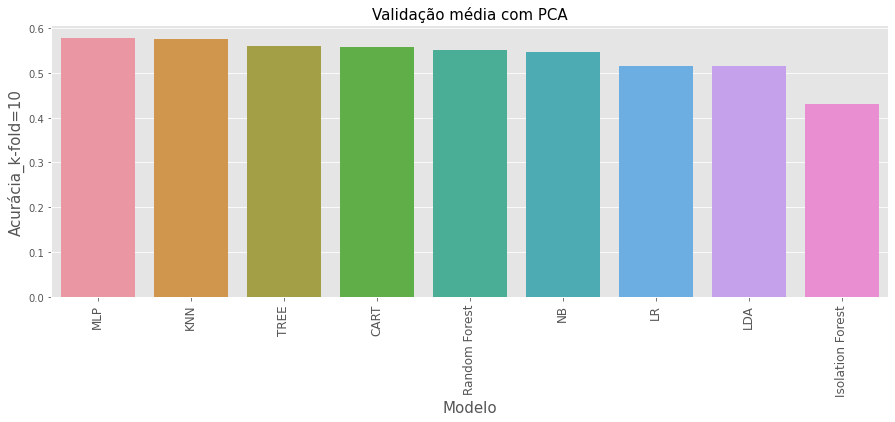

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize = (15,5))
sns.barplot(x = "modelo", y = "Acuracia_k-fold=10 com PCA", data = df_results_pca)
plt.title('Validação média com PCA', fontsize = 15)
#plt.ylim(0.8,1)
plt.xlabel('Modelo', fontsize=15)
plt.ylabel('Acurácia_k-fold=10',fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.show()